# This is the First project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"E:\\Data Sceince\project 1\bigmarket.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---------------------------- *Variable Description* ----------------------------
- **Item_Identifier**: Unique product ID
- **Item_Weight**: Weight of product
- **Item_Fat_Content**: Whether the product is low fat or not
- **Item_Visibility**: The % of the total display area of all products in a store allocated to the particular product
- **Item_Type**: The category to which the product belongs
- **Item_MRP**: Maximum Retail Price (list price) of the product
- **Outlet_Identifier**: Unique store ID
- **Outlet_Establishment_Year**: The year in which the store was established
- **Outlet_Size**: The size of the store in terms of ground area covered
- **Outlet_Location_Type**: The type of city in which the store is located
- **Outlet_Type**: Whether the outlet is just a grocery store or some sort of supermarket
- **Item_Outlet_Sales**: Sales of the product in the particular store. This is the outcome variable to be predicted.
e predicted.

In [4]:
data.shape

(8523, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data=data.drop("Outlet_Establishment_Year",axis=1)
data=data.drop("Outlet_Identifier",axis=1)


# Fill the null data

In [8]:
data["Item_Weight"].mean()

12.857645184135976

In [9]:
# filling the missing data with mean value
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)

In [10]:
# Outlet_Size is objects data so we can not take the mean value of it , we take the mode
data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
mode_of_outlet_size = data.pivot_table(values = 'Outlet_Size' , columns = 'Outlet_Type' , aggfunc = lambda x: x.mode()[0])

In [12]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_data = data['Outlet_Size'].isnull()

In [14]:
missing_data

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [15]:
data.loc[missing_data, 'Outlet_Size'] = data.loc[missing_data, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])
data['Item_Fat_Content'].count()

8523

In [16]:
data.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [17]:
data = pd.DataFrame(data)
import re
# Function to extract numeric part from a string
def extract_numeric(value):
    numeric_part = re.findall(r'\d+', value)  # Find all numeric parts
    return int(numeric_part[0]) if numeric_part else None  # Convert to int if found

# Apply the function to extract numeric part and convert to int
    
data['Item_Identifier'] = data['Item_Identifier'].apply(extract_numeric)

data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,7,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,19,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,22,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,36,8.380,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,46,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
X=data.drop(columns=['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [19]:
print(X.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [20]:
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns
numerical_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [21]:
X.select_dtypes(include='object')

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Small,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Small,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


# Data Analysis

In [22]:
data.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,30.327350,12.857645,0.066132,140.992782,2181.288914
std,17.244758,4.226124,0.051598,62.275067,1706.499616
min,1.000000,4.555000,0.000000,31.290000,33.290000
25%,15.000000,9.310000,0.026989,93.826500,834.247400
50%,30.000000,12.857645,0.053931,143.012800,1794.331000
75%,45.000000,16.000000,0.094585,185.643700,3101.296400
max,60.000000,21.350000,0.328391,266.888400,13086.964800


In [23]:
Float_value = ['Item_Weight' , 	'Item_Visibility',	'Item_MRP' , 	'Item_Outlet_Sales']



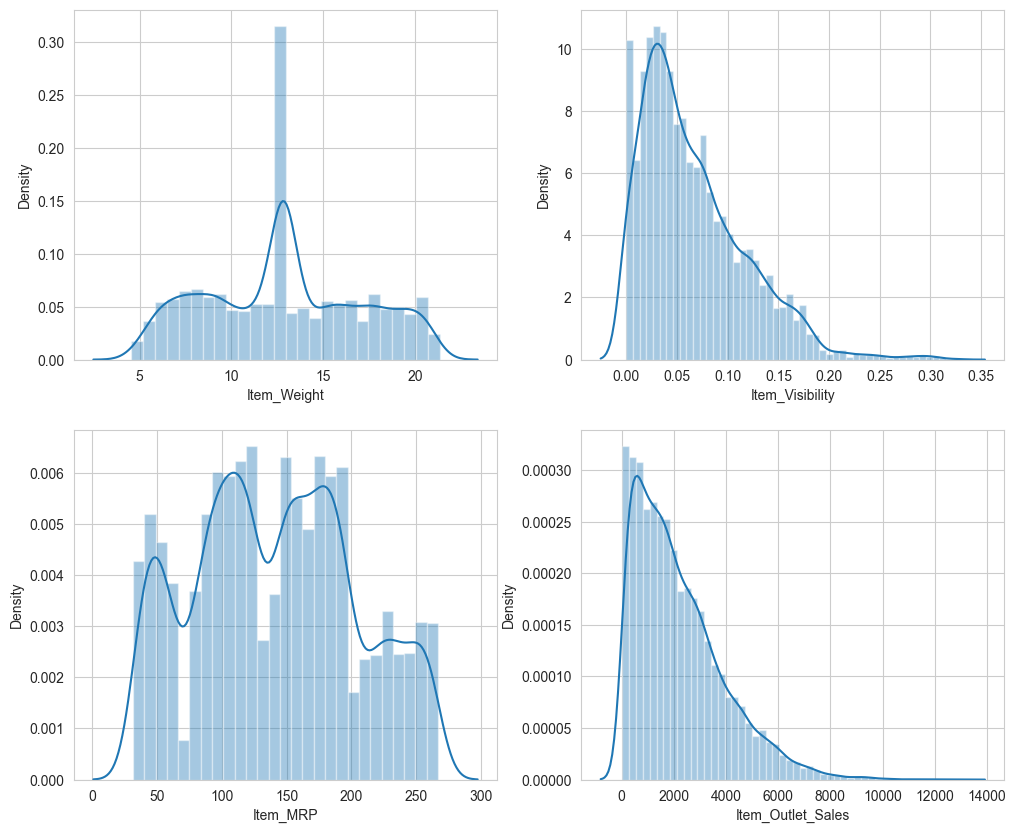

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))## 2 rows, 2 columns
for i , value in enumerate(Float_value) :
    r = i // 2  # Determines the row index
    c = i % 2   # Determines the column index
    sns.distplot(data[value] , ax=axs[r,c])
plt.show()


In [25]:
object_columns = data.select_dtypes(include='object')
object_columns = object_columns.drop(columns=[  'Outlet_Location_Type' , 'Item_Type' ])
object_columns


,Item_Fat_Content,Outlet_Size,Outlet_Type
0,Low Fat,Medium,Supermarket Type1
1,Regular,Medium,Supermarket Type2
2,Low Fat,Medium,Supermarket Type1
3,Regular,Small,Grocery Store
4,Low Fat,High,Supermarket Type1
...,...,...,...
8518,Low Fat,High,Supermarket Type1
8519,Regular,Small,Supermarket Type1
8520,Low Fat,Small,Supermarket Type1
8521,Regular,Medium,Supermarket Type2


In [26]:
object_name = object_columns.columns.tolist()

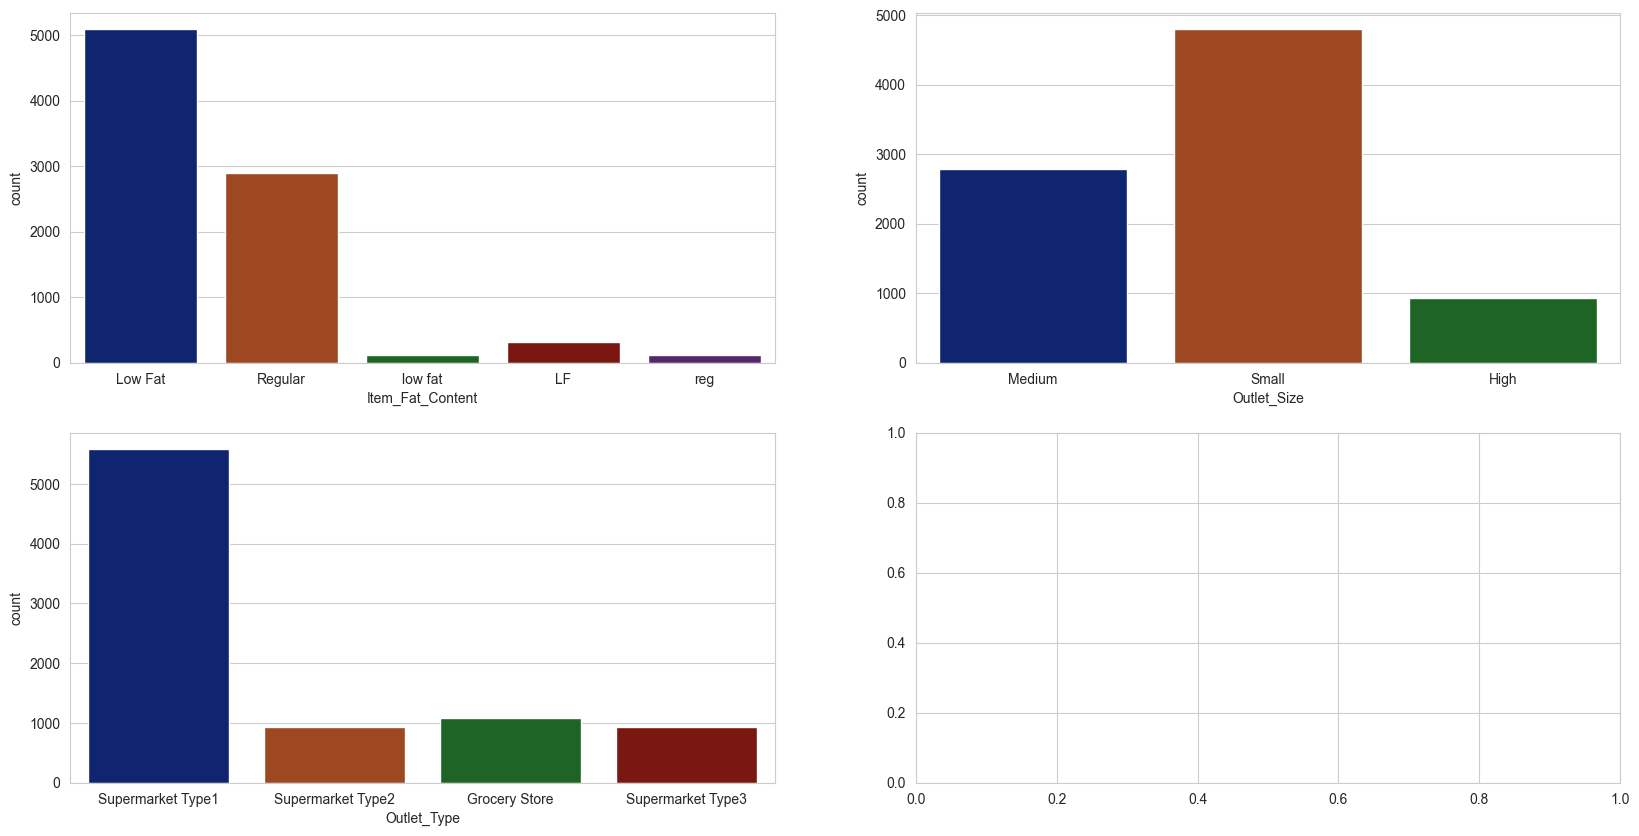

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))## 2 rows, 2 columns
for i , value in enumerate(object_name) :
    r = i // 2  # Determines the row index
    c = i % 2   # Determines the column index
    sns.countplot(x=value, data=data, palette='dark' , ax = axs[r , c])  # Use a color palette
plt.show()


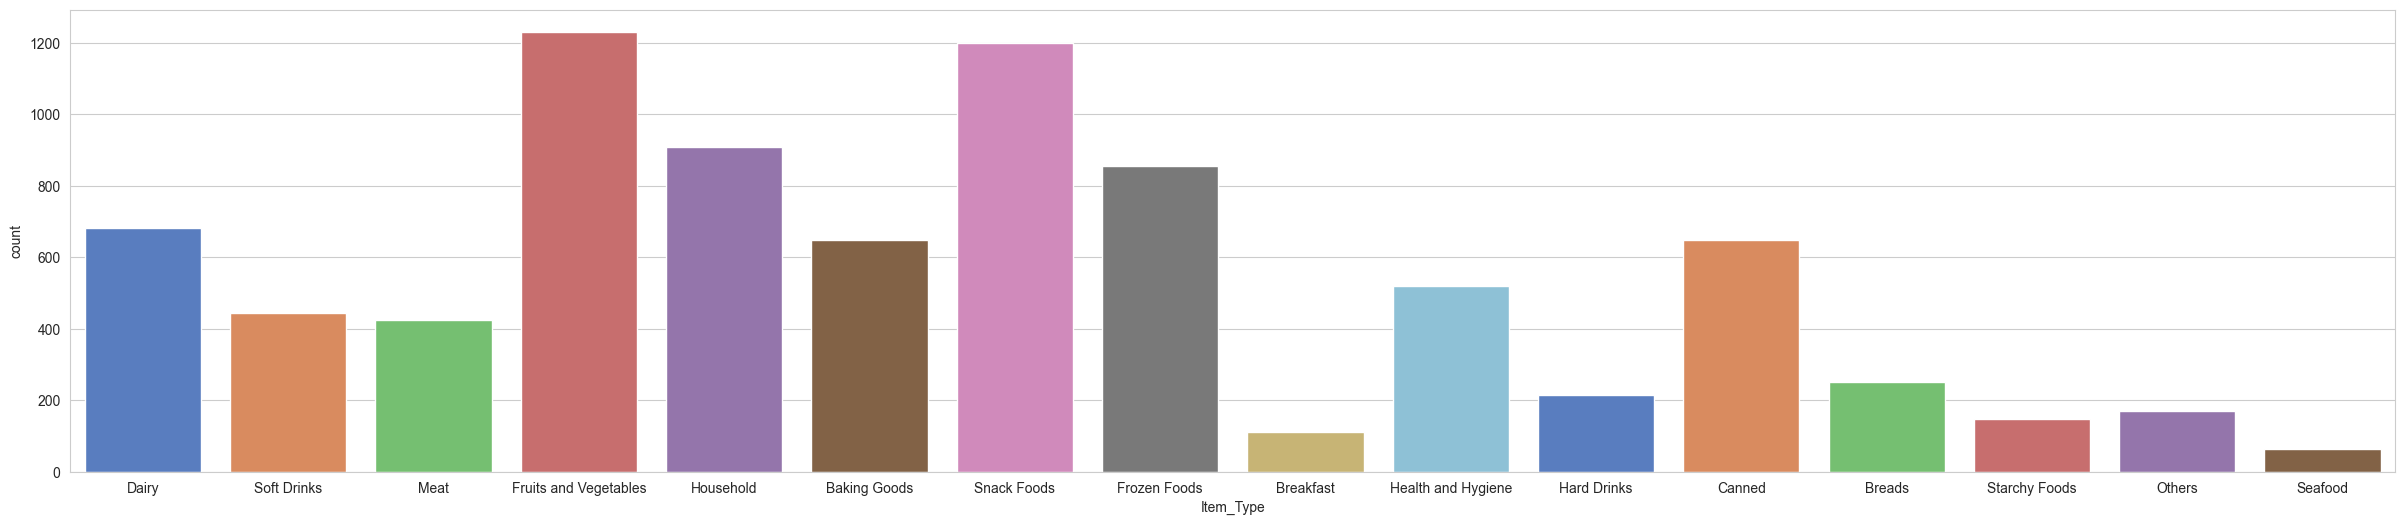

In [28]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data , palette = 'muted')
plt.show()

### when we see in the Item_Fat_Content ,, we lookup that the varabile is just two and thier are scaling in different 5 names
so we need to clean that 

In [29]:
data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [30]:
data.replace({'Item_Fat_Content': {'LF':'Low Fat' , 'low fat':'Low Fat' , 'reg':'Regular' }} , inplace = True)


In [31]:
data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# First we use the liner model 

In [38]:
Item_Fat_Content_map=["Low Fat","Regular","LF","reg","low fat"]
Item_Type_map=["Fruits and Vegetables","Snack Foods","Household","Frozen Foods","Dairy","Canned","Baking Goods","Health and Hygiene",
           "Soft Drinks","Meat","Breads","Hard Drinks","Others","Starchy Foods","Breakfast","Seafood"]
Outlet_Size_map=["Medium","medium","Small","High"]
Outlet_Location_Type_map=["Tier 3","Tier 2","Tier 1"]
Outlet_Type_map=["Supermarket Type1","Grocery Store","Supermarket Type3","Supermarket Type2"]

In [39]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [40]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [41]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[Item_Fat_Content_map,Item_Type_map,Outlet_Size_map,Outlet_Location_Type_map,Outlet_Type_map]))
    ]
    
)

In [42]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [43]:
input_feature_train_arr=preprocessor.fit_transform(X)
input_feature_test_arr=preprocessor.transform(X)
            

          
            
train_array = np.c_[input_feature_train_arr, np.array(y)]
test_array = np.c_[input_feature_test_arr,np.array(y)]
            


In [44]:
#train test split
X_train, y_train, X_test, y_test = (
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [45]:
X_train

array([[-0.88886424, -0.84187169, -0.97073217, ...,  0.        ,
         2.        ,  0.        ],
       [-1.70075277, -1.64170589, -0.90811123, ...,  0.        ,
         0.        ,  3.        ],
       [-0.88886424,  1.09855449, -0.95691733, ...,  0.        ,
         2.        ,  0.        ],
       ...,
       [-0.0769757 , -0.53424315, -0.59978449, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.90888894, -1.33644372,  1.53287976, ...,  0.        ,
         0.        ,  3.        ],
       [-1.70075277,  0.45963367, -0.41193591, ...,  2.        ,
         2.        ,  0.        ]])

In [46]:
X_test

array([[-0.88886424, -0.84187169, -0.97073217, ...,  0.        ,
         2.        ,  0.        ],
       [-1.70075277, -1.64170589, -0.90811123, ...,  0.        ,
         0.        ,  3.        ],
       [-0.88886424,  1.09855449, -0.95691733, ...,  0.        ,
         2.        ,  0.        ],
       ...,
       [-0.0769757 , -0.53424315, -0.59978449, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.90888894, -1.33644372,  1.53287976, ...,  0.        ,
         0.        ,  3.        ],
       [-1.70075277,  0.45963367, -0.41193591, ...,  2.        ,
         2.        ,  0.        ]])

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
model4=RandomForestRegressor()

In [49]:
model4.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
model4.score(X_train,y_train)

0.9362594487022363

In [51]:
y_pred4=model4.predict(X_test)


In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,y_pred4)

0.9362594487022363